In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


def Euclidian_Distance(x,y):
    sum=0
    for i in range(len(x)):
        sum+= (x[i]-y[i])**2
    p= math.sqrt(sum)
    return p

In [12]:
def heirarchical_algorithm(df):
    arr_len= len(df)
    num_cols= len(df.columns)
    dist_mat= np.zeros((arr_len,arr_len))
    for i in range(arr_len):
        for j in range(i+1,arr_len):
            a=[]
            b=[]
            for k in df.columns:
                a.append(df.at[i,k])
                b.append(df.at[j,k])

            d= Euclidian_Distance(a,b)
            dist_mat[i][j]=d
    original_mat = dist_mat.copy()
    while(arr_len>1):
        for i in range(arr_len):
            for j in range(i+1,arr_len):
                dist_mat[j][i]= dist_mat[i][j]

        m=dist_mat[0][1]
        row=1
        col=0
        for i in range(arr_len):
            for j in range(i+1,arr_len):
                if m>dist_mat[i][j]:
                    m=dist_mat[i][j]
                    row=i
                    col=j

        print('\n\nmin=',m)
        min_val= min(row,col)
        max_val= max(row,col)
    
        arr= np.array(dist_mat)
        print(arr)
    
        arr_len-=1
        if arr_len==1:
            break
    
        dist_mat= np.zeros((arr_len,arr_len))
    
        for i in range(arr_len+1):
            for j in range(i+1,arr_len+1):
            
                if j==max_val or i==max_val:
                    continue
            
                if i==min_val or j==min_val:
                    r=i
                    c=j
                    if j==min_val:
                        if i>max_val:
                            r=i-1
                            
                        elif j>max_val:
                            c=j-1
                        dist_mat[r][c]= min(arr[i][min_val],arr[i][max_val])
                        
                    elif i==min_val:
                        if i>max_val:
                            r=i-1
                            
                        elif j>max_val:
                            c=j-1
                        dist_mat[r][c]= min(arr[min_val][j],arr[max_val][j])
                    continue
            
                if i>max_val or j>max_val:
                    if j>max_val and i>max_val:
                        dist_mat[i-1][j-1]= arr[i][j]
                    elif j>max_val:
                        dist_mat[i][j-1]= arr[i][j]
                    elif i>max_val:
                        dist_mat[i-1][j]= arr[i][j]

                else:
                    dist_mat[i][j]= arr[i][j]
    return original_mat

In [16]:
df= pd.read_csv("hier.csv")
cluster_points= heirarchical_algorithm(df)



min= 0.5
[[0.         0.70710678 5.65685425 3.60555128 4.24264069 3.20156212]
 [0.70710678 0.         4.94974747 2.91547595 3.53553391 2.5       ]
 [5.65685425 4.94974747 0.         2.23606798 1.41421356 2.5       ]
 [3.60555128 2.91547595 2.23606798 0.         1.         0.5       ]
 [4.24264069 3.53553391 1.41421356 1.         0.         1.11803399]
 [3.20156212 2.5        2.5        0.5        1.11803399 0.        ]]


min= 0.7071067811865476
[[0.         0.70710678 5.65685425 3.20156212 4.24264069]
 [0.70710678 0.         4.94974747 2.5        3.53553391]
 [5.65685425 4.94974747 0.         2.23606798 1.41421356]
 [3.20156212 2.5        2.23606798 0.         1.        ]
 [4.24264069 3.53553391 1.41421356 1.         0.        ]]


min= 1.0
[[0.         4.94974747 2.5        3.53553391]
 [4.94974747 0.         2.23606798 1.41421356]
 [2.5        2.23606798 0.         1.        ]
 [3.53553391 1.41421356 1.         0.        ]]


min= 1.4142135623730951
[[0.         4.94974747 2.5    

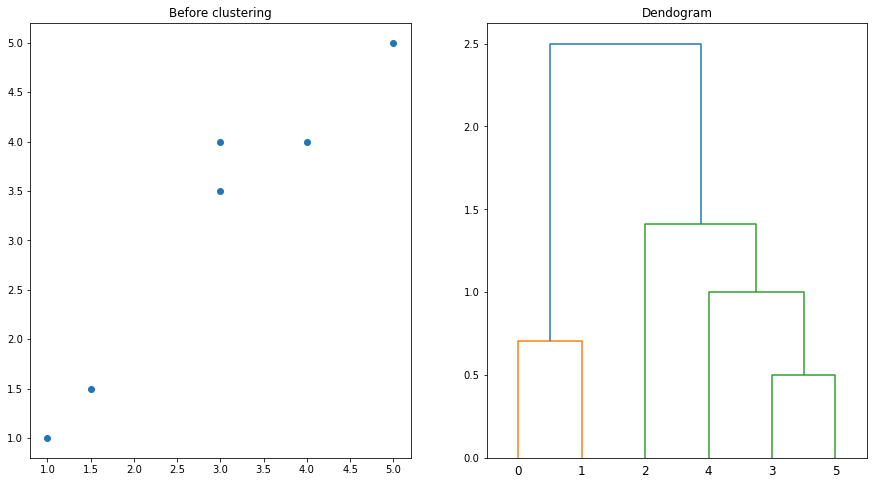

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

fig,ax=plt.subplots(1,2, figsize=(15,8))
ax[0].scatter(df['x1'],df['x2'])
ax[0].set_title("Before clustering")

shape = cluster_points.shape
for i in range(shape[0]):
    for j in range(i+1,shape[1]):
        cluster_points[j][i]= cluster_points[i][j]

dists = squareform(cluster_points)
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix)
plt.title("Dendogram")
plt.show()